### Games Dataset

In [64]:
import sys
sys.path.append("../Lib")
import utils as ut
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [65]:
# Obteniendo el conjunto de datos
df_reviews = pd.read_csv('../Data/csv/reviews_clean.csv', encoding='utf-8')
df_games = pd.read_csv('../Datasets/Clean/steam_games.csv.gz', encoding='utf-8')
df_items = pd.read_csv('../Datasets/Clean/users_items.csv.gz', encoding='utf-8')

### Games Table

In [66]:
df_games

,publisher,genres,item_name,price,early_access,item_id,developer,release_year
0,Kotoshiro,Action,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
1,Kotoshiro,Casual,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
2,Kotoshiro,Indie,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
3,Kotoshiro,Simulation,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
4,Kotoshiro,Strategy,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
...,...,...,...,...,...,...,...,...
84206,NaN,Adventure,Maze Run VR,4.99,True,681550,NaN,no data
84207,NaN,Indie,Maze Run VR,4.99,True,681550,NaN,no data
84208,NaN,Action,Maze Run VR,4.99,True,681550,NaN,no data
84209,NaN,Simulation,Maze Run VR,4.99,True,681550,NaN,no data


In [67]:
# Inicialmente, verifiquemos el número total de juegos.
total_games = len(df_games['item_name'].unique())
print(f"Total games: {total_games}")

Total games: 32019


In [68]:
# Ahora, verifiquemos la cantidad de juegos por año de lanzamiento.
# Contando la cantidad de juegos lanzados por año y organícelos por cantidad de mayor a menor
games_per_year = df_games['release_year'].value_counts().sort_values(ascending=False)[:15]

# Imprimiendo resultado
print(games_per_year)

release_year
2017       25766
2016       18010
2015       12596
no data    10389
2014        6542
2013        3192
2012        2256
2011        1127
2010         794
2009         571
2018         503
2008         389
2007         322
2006         275
2005         175
Name: count, dtype: int64


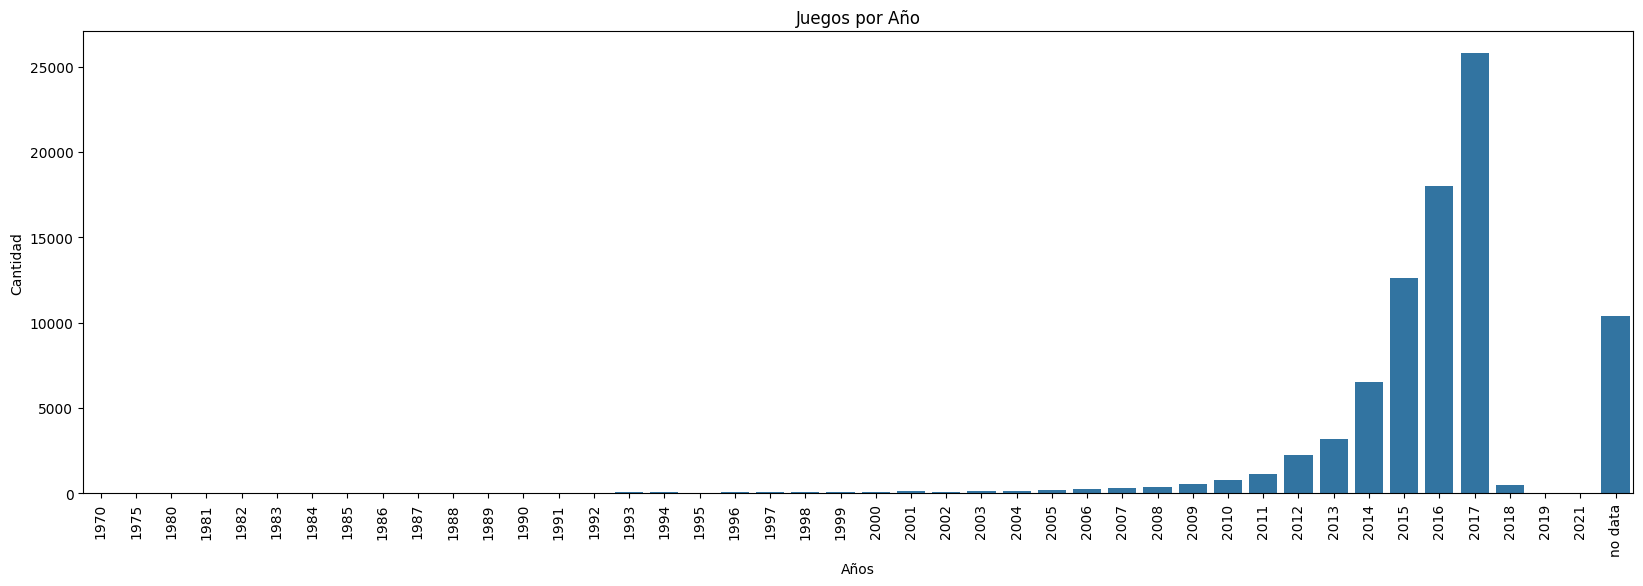

In [69]:
# Obtener orden de años
df_sorted = df_games.sort_values(by='release_year')

# Plot
plt.figure(figsize=(20, 6))
sns.countplot(data=df_sorted, x='release_year')
plt.xlabel('Años')
plt.ylabel('Cantidad')
plt.title('Juegos por Año')
plt.xticks(rotation=90)
plt.show()

In [70]:
# Filtrar el DataFrame excluyendo "sin datos" en la columna "publisher"
filtered_df = df_games[df_games['publisher'] != 'No data']

# Cuente la cantidad de juegos por publisher
pub_qty = filtered_df['publisher'].value_counts()[:10]

# Filtrar el DataFrame excluyendo "sin datos" en la columna "developer"
filtered_df = df_games[df_games['developer'] != 'No data']

# Cuente el número de juegos por developer
dev_qty = filtered_df['developer'].value_counts()[:10]

# Imprimiendo resultados 
print(f'Juegos por', pub_qty)
print(f'\nJuegos por', dev_qty)

Juegos por publisher
SmiteWorks USA, LLC        2364
Ubisoft - San Francisco    2161
KISS ltd                    804
Ubisoft                     723
Degica                      541
SEGA                        466
Paradox Interactive         448
Big Fish Games              382
Ronimo Games                379
Dovetail Games - Trains     360
Name: count, dtype: int64

Juegos por developer
Ubisoft - San Francisco       2516
SmiteWorks USA, LLC           2364
DL Softworks                   495
Ronimo Games                   379
Paradox Development Studio     311
Musopia                        285
Arcane Raise                   268
Dovetail Games                 256
Choice of Games                248
Boogygames Studios             236
Name: count, dtype: int64


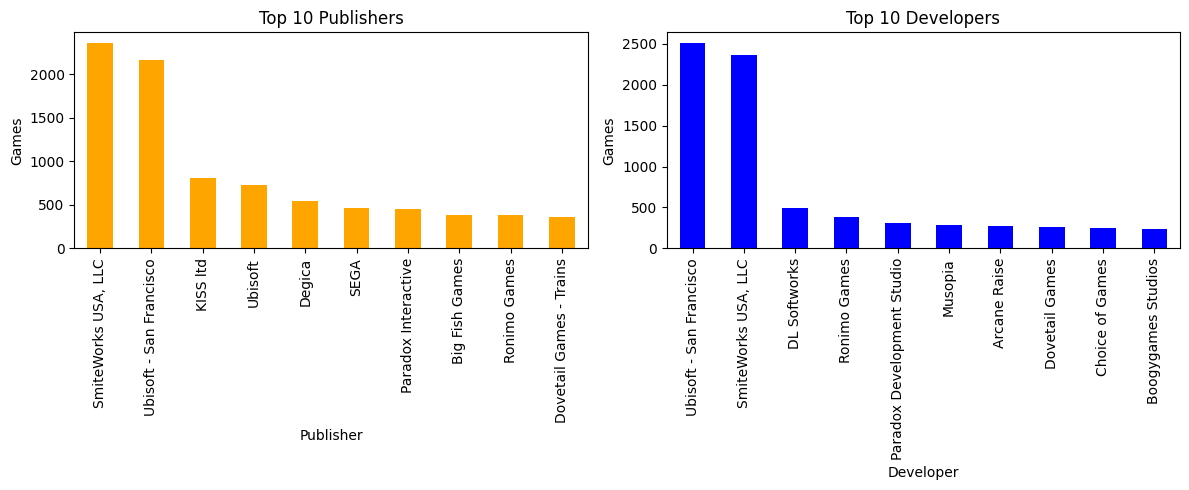

In [71]:
plt.figure(figsize=(12, 5))

# Publishers plot
plt.subplot(1, 2, 1)
pub_qty.plot(kind='bar', color='orange')
plt.xlabel('Publisher') ; plt.ylabel('Games') ; plt.title('Top 10 Publishers')

# Developers plot
plt.subplot(1, 2, 2)
dev_qty.plot(kind='bar', color='blue')
plt.xlabel('Developer') ; plt.ylabel('Games') ; plt.title('Top 10 Developers')

# Mostrar plot
plt.tight_layout()
plt.show()

¿Cuántos juegos tienen acceso anticipado?

In [72]:
# Cuente el número de registros para cada valor único en 'early_access'
early_access_counts = df_games['early_access'].value_counts()
early_access_counts

early_access
False    75444
True      8767
Name: count, dtype: int64

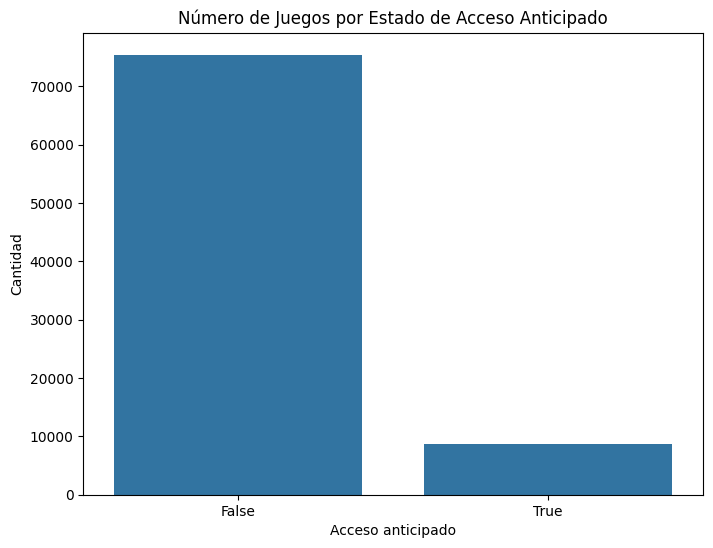

In [73]:
# Gráfico de número de registros para cada valor único
plt.figure(figsize=(8, 6))
sns.countplot(data=df_games, x='early_access')
plt.xlabel('Acceso anticipado')
plt.ylabel('Cantidad')
plt.title('Número de Juegos por Estado de Acceso Anticipado')
plt.show()

In [74]:
# Analizando géneros y juegos. Creo que tienen una buena información para nuestros modelos.
df_genre = df_games[df_games['genres'] != 'No data']

genre_counts = df_genre['genres'].value_counts()[:10]
print(genre_counts)

genres
Indie           17124
Action          12420
Casual           9148
Adventure        8846
Simulation       7373
Strategy         7159
RPG              5606
Free to Play     2211
Early Access     1943
VR               1712
Name: count, dtype: int64


Text(0.5, 1.0, 'Los 10 mejores Generos por Cantidad')

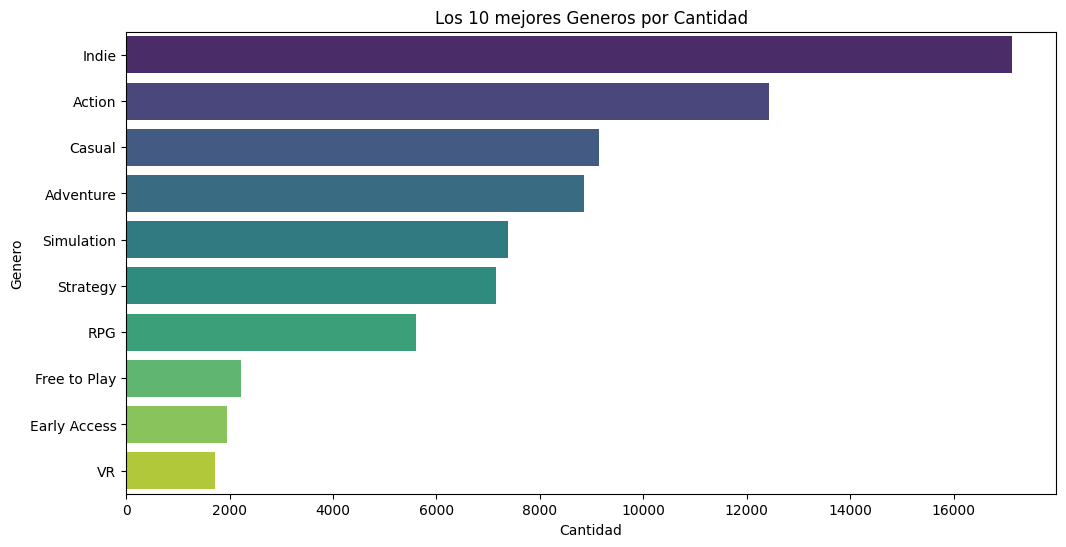

In [75]:
# Obtén los 10 géneros principales por cantidad
top10_genres = df_genre['genres'].value_counts().head(10)

# Graficar en un diagrama de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_genres.values, y=top10_genres.index, palette='viridis')

plt.xlabel('Cantidad')
plt.ylabel('Genero')
plt.title('Los 10 mejores Generos por Cantidad')

### ITEMS TABLE

In [76]:
df_items

,item_id,item_name,playtime_forever,user_id,items_count
0,10,Counter-Strike,6,76561197970982479,277
1,30,Day of Defeat,7,76561197970982479,277
2,300,Day of Defeat: Source,4733,76561197970982479,277
3,240,Counter-Strike: Source,1853,76561197970982479,277
4,3830,Psychonauts,333,76561197970982479,277
...,...,...,...,...,...
3246370,304930,Unturned,677,76561198329548331,7
3246371,227940,Heroes & Generals,43,76561198329548331,7
3246372,388490,One Way To Die: Steam Edition,3,76561198329548331,7
3246373,521570,You Have 10 Seconds 2,4,76561198329548331,7


In [77]:
# Para nuestro modelo, solo tenemos 2 variables para analizar en la tabla df_items
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()
items_count_user

user_id
--000--               58
--ace--               44
--ionex--             23
-2SV-vuLB-Kg          68
-404PageNotFound-    149
                    ... 
zzonci                 5
zzoptimuszz           61
zzydrax               13
zzyfo                 84
zzzmidmiss            69
Name: items_count, Length: 68403, dtype: object

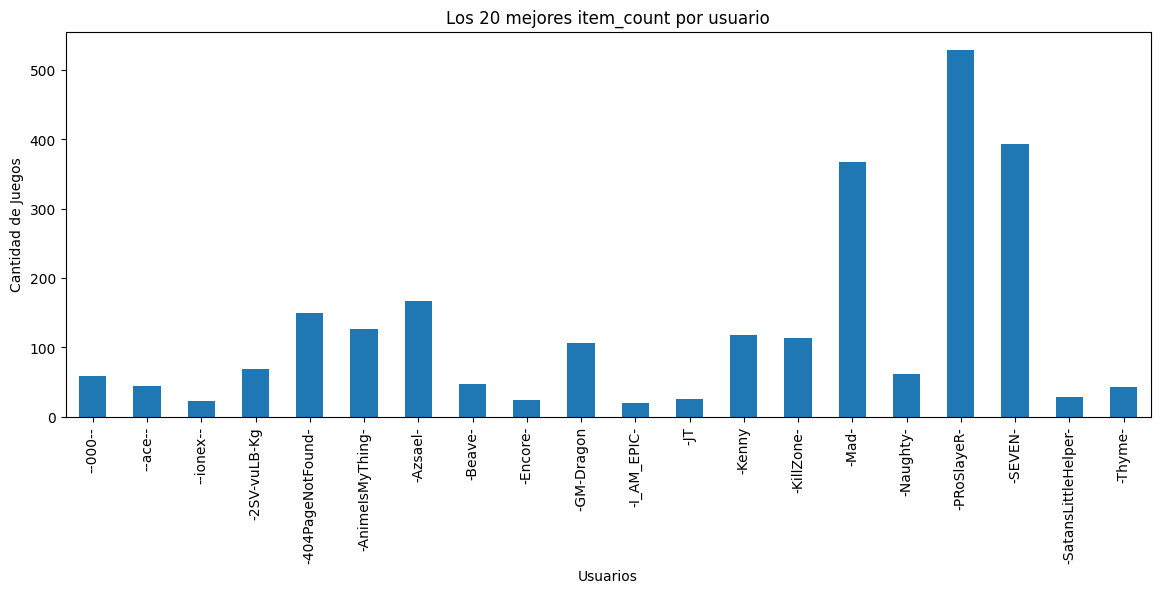

In [78]:
# Diagrama de cantidad de items por uusario
plt.figure(figsize=(14, 5))
items_count_user[:20].plot(kind='bar')
plt.xlabel('Usuarios') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Los 20 mejores item_count por usuario')
plt.show()

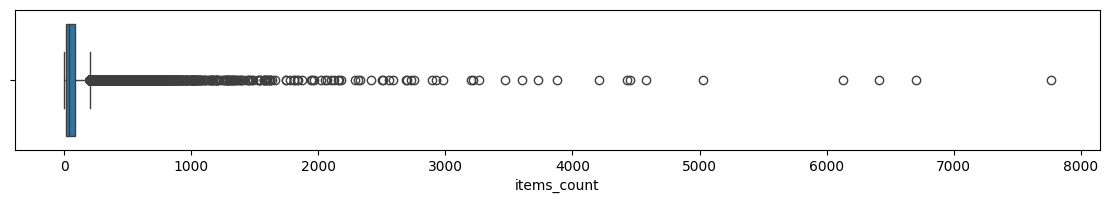

In [79]:
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(212)
sns.boxplot(data=items_count_user_o, x='items_count', ax=ax1)
ax1.set_xlabel('items_count')

plt.show()

### Model

Ahora, seleccionaremos variables para nuestros modelos de ML. 

Modelo 1: El modelo debe tener una relación ítem-ítem, es decir, se toma un ítem, en base a lo similar que sea ese ítem al resto se recomiendan similares. Nuestros artículos son juegos, por lo que los relacionaremos por género. 

Modelo 2: El sistema de recomendación debe aplicar el filtro usuario-elemento, es decir, tomar un usuario, buscar usuarios similares y recomendar artículos que les hayan gustado a esos usuarios similares. 

Luego tomaremos la relación entre los usuarios, sus recomendaciones y los juegos jugados por usuarios con características similares. Finalmente, vamos a unir las tablas de modelos en una sola tabla de modelos para cargar en nuestro archivo de modelos de ceromendaciones.

In [80]:
df_games

,publisher,genres,item_name,price,early_access,item_id,developer,release_year
0,Kotoshiro,Action,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
1,Kotoshiro,Casual,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
2,Kotoshiro,Indie,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
3,Kotoshiro,Simulation,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
4,Kotoshiro,Strategy,Lost Summoner Kitty,4.99,False,761140,Kotoshiro,2018
...,...,...,...,...,...,...,...,...
84206,NaN,Adventure,Maze Run VR,4.99,True,681550,NaN,no data
84207,NaN,Indie,Maze Run VR,4.99,True,681550,NaN,no data
84208,NaN,Action,Maze Run VR,4.99,True,681550,NaN,no data
84209,NaN,Simulation,Maze Run VR,4.99,True,681550,NaN,no data


### Model 1

In [81]:
df_model1 = df_games[['item_id', 'item_name', 'genres']]
df_model1

,item_id,item_name,genres
0,761140,Lost Summoner Kitty,Action
1,761140,Lost Summoner Kitty,Casual
2,761140,Lost Summoner Kitty,Indie
3,761140,Lost Summoner Kitty,Simulation
4,761140,Lost Summoner Kitty,Strategy
...,...,...,...
84206,681550,Maze Run VR,Adventure
84207,681550,Maze Run VR,Indie
84208,681550,Maze Run VR,Action
84209,681550,Maze Run VR,Simulation


In [82]:
df_model1.drop_duplicates(inplace=True)
df_model1

,item_id,item_name,genres
0,761140,Lost Summoner Kitty,Action
1,761140,Lost Summoner Kitty,Casual
2,761140,Lost Summoner Kitty,Indie
3,761140,Lost Summoner Kitty,Simulation
4,761140,Lost Summoner Kitty,Strategy
...,...,...,...
84206,681550,Maze Run VR,Adventure
84207,681550,Maze Run VR,Indie
84208,681550,Maze Run VR,Action
84209,681550,Maze Run VR,Simulation


In [83]:
ut.data_summ(df_model1)


Total rows:  84200

Total full null rows:  0


,Column,Data_type,No_miss_Qty,%Missing,Missing_Qty
0,item_id,[<class 'int'>],84200,0.00,0
1,item_name,"[<class 'str'>, <class 'float'>]",84198,0.00,2
2,genres,"[<class 'str'>, <class 'float'>]",84063,0.16,137


In [84]:
def summary(df_model1):
    print(f'data shape: {df_model1.shape}')
    summ = pd.DataFrame(df_model1.dtypes, columns=['data type'])
    summ['#missing'] = df_model1.isnull().sum()
    summ['%missing'] = df_model1.isnull().sum()*100/len(df_model1)
    summ['#unique'] = df_model1.nunique()
    desc = pd.DataFrame(df_model1.describe(include='all').T)
    summ['min'] = desc['min']
    summ['max'] = desc['max']
    return summ

summary(df_model1)

data shape: (84200, 3)


,data type,#missing,%missing,#unique,min,max
item_id,int64,0,0.000000,32019,10.0,2028850.0
item_name,object,2,0.002375,32018,NaN,NaN
genres,object,137,0.162708,256,NaN,NaN


### Model 2

In [85]:
df_auxr = df_reviews[['user_id', 'recommend', 'sentiment_analysis']]
df_auxi = df_items[['item_id', 'item_name', 'user_id']]
df_model2 = df_auxi.merge(df_auxr, on='user_id', how='inner')
df_model2

,item_id,item_name,user_id,recommend,sentiment_analysis
0,10,Counter-Strike,76561197970982479,True,2
1,10,Counter-Strike,76561197970982479,True,2
2,10,Counter-Strike,76561197970982479,True,2
3,30,Day of Defeat,76561197970982479,True,2
4,30,Day of Defeat,76561197970982479,True,2
...,...,...,...,...,...
4793069,400040,ShareX,76561198312638244,True,2
4793070,379720,DOOM,76561198312638244,True,2
4793071,379720,DOOM,76561198312638244,True,2
4793072,379720,DOOM,76561198312638244,True,2


In [86]:
df_model2.drop_duplicates(inplace=True)
df_model2

,item_id,item_name,user_id,recommend,sentiment_analysis
0,10,Counter-Strike,76561197970982479,True,2
3,30,Day of Defeat,76561197970982479,True,2
6,300,Day of Defeat: Source,76561197970982479,True,2
9,240,Counter-Strike: Source,76561197970982479,True,2
12,3830,Psychonauts,76561197970982479,True,2
...,...,...,...,...,...
4793054,238010,Deus Ex: Human Revolution - Director's Cut,76561198312638244,True,2
4793058,730,Counter-Strike: Global Offensive,76561198312638244,True,2
4793062,362890,Black Mesa,76561198312638244,True,2
4793066,400040,ShareX,76561198312638244,True,2


In [87]:
row = df_model2[df_model2['item_name'] == 'Counter-Strike']
row

,item_id,item_name,user_id,recommend,sentiment_analysis
0,10,Counter-Strike,76561197970982479,True,2
2805,10,Counter-Strike,doctr,True,2
2809,10,Counter-Strike,doctr,True,0
6785,10,Counter-Strike,WeiEDKrSat,True,1
7284,10,Counter-Strike,death-hunter,True,2
...,...,...,...,...,...
4790387,10,Counter-Strike,K1NGCJS,True,1
4790389,10,Counter-Strike,K1NGCJS,False,0
4791118,10,Counter-Strike,76561198208507532,True,0
4791119,10,Counter-Strike,76561198208507532,True,2


In [88]:
df_model2 = df_model2.drop_duplicates(subset=['item_id', 'user_id'], keep= 'first')
df_model2

,item_id,item_name,user_id,recommend,sentiment_analysis
0,10,Counter-Strike,76561197970982479,True,2
3,30,Day of Defeat,76561197970982479,True,2
6,300,Day of Defeat: Source,76561197970982479,True,2
9,240,Counter-Strike: Source,76561197970982479,True,2
12,3830,Psychonauts,76561197970982479,True,2
...,...,...,...,...,...
4793054,238010,Deus Ex: Human Revolution - Director's Cut,76561198312638244,True,2
4793058,730,Counter-Strike: Global Offensive,76561198312638244,True,2
4793062,362890,Black Mesa,76561198312638244,True,2
4793066,400040,ShareX,76561198312638244,True,2


Vamos a crear una nueva columna llamada 'Rating' donde clasificaremos los juegos según la recomendación dada por los usuarios y el análisis de sentimiento dado al juego respectivo.

In [89]:
def rating_def(row):
    '''
    Calculates a rating based on sentiment analysis and game review recommendations made by users.

    Parameters:
    row (dict): A dictionary containing the following keys:
        - "sentiment_analysis" (int): The sentiment analysis score (0, 1 or 2).
        - "recommend" (bool): Indicates whether the reviews recommend.

    Return:
        int or None: The rating calculated as an integer between 1 and 5, or None if the inputs are invalid.
    '''
    if row["sentiment_analysis"] == 0 and not row["recommend"]:
        return 1
    elif row["sentiment_analysis"] == 0 and row["recommend"]:
        return 1
    elif row["sentiment_analysis"] == 1 and not row["recommend"]:
        return 2
    elif row["sentiment_analysis"] == 1 and row["recommend"]:
        return 3
    elif row["sentiment_analysis"] == 2 and not row["recommend"]:
        return 4
    elif row["sentiment_analysis"] == 2 and row["recommend"]:
        return 5
    else:
        return None

In [90]:
df_model2['rating'] = df_model2.apply(rating_def, axis=1)
df_model2.drop(columns=['recommend', 'sentiment_analysis'], inplace=True)
df_model2

,item_id,item_name,user_id,rating
0,10,Counter-Strike,76561197970982479,5
3,30,Day of Defeat,76561197970982479,5
6,300,Day of Defeat: Source,76561197970982479,5
9,240,Counter-Strike: Source,76561197970982479,5
12,3830,Psychonauts,76561197970982479,5
...,...,...,...,...
4793054,238010,Deus Ex: Human Revolution - Director's Cut,76561198312638244,5
4793058,730,Counter-Strike: Global Offensive,76561198312638244,5
4793062,362890,Black Mesa,76561198312638244,5
4793066,400040,ShareX,76561198312638244,5


Uniendo Model 1 y Model 2

In [91]:
model = df_model1.merge(df_model2, on='item_name', how='inner')
model

,item_id_x,item_name,genres,item_id_y,user_id,rating
0,282010,Carmageddon Max Pack,Action,282010,UTNerd24,1
1,282010,Carmageddon Max Pack,Action,282010,saint556,5
2,282010,Carmageddon Max Pack,Action,282010,chidvd,5
3,282010,Carmageddon Max Pack,Action,282010,aerpub,1
4,282010,Carmageddon Max Pack,Action,282010,76561198001688490,5
...,...,...,...,...,...,...
3382627,80,Counter-Strike: Condition Zero,Action,80,jazzecks,5
3382628,80,Counter-Strike: Condition Zero,Action,80,lachwe,5
3382629,80,Counter-Strike: Condition Zero,Action,80,danebuchanan,5
3382630,80,Counter-Strike: Condition Zero,Action,80,76561198208507532,1


In [92]:
model.drop('item_id_y', axis=1, inplace=True)
model.rename(columns={'item_id_x': 'item_id'}, inplace=True)
model.drop_duplicates(inplace=True)
model

,item_id,item_name,genres,user_id,rating
0,282010,Carmageddon Max Pack,Action,UTNerd24,1
1,282010,Carmageddon Max Pack,Action,saint556,5
2,282010,Carmageddon Max Pack,Action,chidvd,5
3,282010,Carmageddon Max Pack,Action,aerpub,1
4,282010,Carmageddon Max Pack,Action,76561198001688490,5
...,...,...,...,...,...
3382627,80,Counter-Strike: Condition Zero,Action,jazzecks,5
3382628,80,Counter-Strike: Condition Zero,Action,lachwe,5
3382629,80,Counter-Strike: Condition Zero,Action,danebuchanan,5
3382630,80,Counter-Strike: Condition Zero,Action,76561198208507532,1


In [93]:
ut.data_summ(model)


Total rows:  3382339

Total full null rows:  0


,Column,Data_type,No_miss_Qty,%Missing,Missing_Qty
0,item_id,[<class 'int'>],3382339,0.0,0
1,item_name,[<class 'str'>],3382339,0.0,0
2,genres,[<class 'str'>],3382339,0.0,0
3,user_id,[<class 'str'>],3382339,0.0,0
4,rating,[<class 'int'>],3382339,0.0,0


In [94]:
dfs = [model]
# Nombres correspondientes a cada DataFrame
names = ['model']

ut.save_to_csv(dfs, names)

DataFrame 'model' saved as '../Data/csv/model.csv'
